In [1]:
!pip install pandas scikit-learn factor-analyzer matplotlib seaborn numpy df2img==0.2.18 openpyxl statsmodels

In [2]:
#Importing required modules
import pandas as pd #n Pandas is a Python library for data analysis
import sklearn.datasets # Statistical tools like classification, regression, clustering and dimensionality reduction
from factor_analyzer import FactorAnalyzer
from factor_analyzer import utils
import matplotlib.pyplot as plt #Plotting graphs
import seaborn as sns # for data visualization in better graphics
import numpy as np # Mathematical calculations
import df2img
import math as math
import collections
from statsmodels.stats.outliers_influence import variance_inflation_factor
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import warnings
warnings.filterwarnings('ignore')

In [3]:
# input data
data_original = pd.read_excel("C:/Users/Dell/Desktop/plywood_final_Responses.xlsx")
data=data_original

In [4]:
data.sample(3)

,Gender,Age,Current Occupation,Education Level,Place of Residence,Monthly Household Income,How did you first learn about Archidply products?,Approximately how much did you spend on Archidply products on an average ?,Which Archiply Industries' product(s) are you using or considering?(Select all that apply),How satisfied are you with Archidply's after-sales service and support?,...,Rate your satisfaction with the following aspects of Archidply products on a scale of 1 to 5.\n1 = Very Dissatisfied\n2 = Somewhat Dissatisfied\n3 = Neither Satisfied nor Dissatisfied\n4 = Somewhat Satisfied\n5 = Very Satisfied [Color Options],Rate your satisfaction with the following aspects of Archidply products on a scale of 1 to 5.\n1 = Very Dissatisfied\n2 = Somewhat Dissatisfied\n3 = Neither Satisfied nor Dissatisfied\n4 = Somewhat Satisfied\n5 = Very Satisfied [Scratch Resistance],Rate your satisfaction with the following aspects of Archidply products on a scale of 1 to 5.\n1 = Very Dissatisfied\n2 = Somewhat Dissatisfied\n3 = Neither Satisfied nor Dissatisfied\n4 = Somewhat Satisfied\n5 = Very Satisfied [Water Resistance],Rate your satisfaction with the following aspects of Archidply products on a scale of 1 to 5.\n1 = Very Dissatisfied\n2 = Somewhat Dissatisfied\n3 = Neither Satisfied nor Dissatisfied\n4 = Somewhat Satisfied\n5 = Very Satisfied [Fire Resistance],Rate your satisfaction with the following aspects of Archidply products on a scale of 1 to 5.\n1 = Very Dissatisfied\n2 = Somewhat Dissatisfied\n3 = Neither Satisfied nor Dissatisfied\n4 = Somewhat Satisfied\n5 = Very Satisfied [Rot/Decay Resistance],Rate your satisfaction with the following aspects of Archidply products on a scale of 1 to 5.\n1 = Very Dissatisfied\n2 = Somewhat Dissatisfied\n3 = Neither Satisfied nor Dissatisfied\n4 = Somewhat Satisfied\n5 = Very Satisfied [Sustainability],"If Yes, then please specify.",What new product ideas or improvements would you suggest to Archidply?,Which other brands did you consider before choosing Archidply?,"Any other comments, feedback or suggestions related to Archidply products and services?"
7,Male,18-25 years,Student,Master's Degree,City/Urban Area,Below 25k,Contractor/Interior Designer Recommendation,25k-50k,Doors,Neither Satisfied nor Dissatisfied,...,3,2,1,2,1,2,NaN,NaN,NaN,NaN
54,Male,26-35 years,Salaried Employee,Master's Degree,City/Urban Area,50k-75k,Online Research,25k-50k,"Plywood, Laminates",Somewhat Satisfied,...,4,4,5,4,5,4,NaN,NaN,NaN,NaN
109,Male,26-35 years,Salaried Employee,Master's Degree,City/Urban Area,75k-100k,Word of Mouth,Less than 25k,"Plywood, MDF(Medium-Density Fiberboard), Doors...",Somewhat Dissatisfied,...,4,4,4,4,4,4,NaN,NaN,NaN,NaN


In [5]:
#number of demographic variables
dv=12
demographic_variables=data.iloc[:,0:dv+1]

In [7]:
demographic_variables.head()

,Gender,Age,Current Occupation,Education Level,Place of Residence,Monthly Household Income,How did you first learn about Archidply products?,Approximately how much did you spend on Archidply products on an average ?,Which Archiply Industries' product(s) are you using or considering?(Select all that apply),How satisfied are you with Archidply's after-sales service and support?,What is your overall level of satisfaction with Archidply products and services?,How likely are you to recommend Archidply products to others?,Have you faced any major issues or challenges with Archidply products?
0,Male,36-45 years,Salaried Employee,Master's Degree,City/Urban Area,Above 100k,Retailer/Dealer Showroom,Less than 25k,"Plywood, Laminates",Somewhat Satisfied,Somewhat Satisfied,Very likely,No
1,Female,26-35 years,Salaried Employee,Master's Degree,Town/Semi-Urban Area,50k-75k,Television/Print Advertisement,50k-100k,"Plywood, Doors, Laminates",Somewhat Satisfied,Somewhat Satisfied,Moderately likely,No
2,Female,26-35 years,Self-Employed/Business Owner,Master's Degree,City/Urban Area,25k-50k,Word of Mouth,50k-100k,Laminates,Neither Satisfied nor Dissatisfied,Neither Satisfied nor Dissatisfied,Moderately likely,No
3,Female,36-45 years,Homemaker,Bachelor's Degree,City/Urban Area,50k-75k,Television/Print Advertisement,100k-200k,"Plywood, Doors, Laminates, WPC",Very Satisfied,Somewhat Satisfied,Moderately likely,No
4,Male,46-55 years,Self-Employed/Business Owner,Master's Degree,Town/Semi-Urban Area,50k-75k,Word of Mouth,Less than 25k,"Plywood, Doors",Somewhat Satisfied,Neither Satisfied nor Dissatisfied,Moderately likely,No


In [8]:
fact=pd.read_csv('./fab_plywood.csv')

In [9]:
factors=fact

In [10]:
factors

,Product Quality,Price,Durability,Design/Aesthetics,Value for Money,Ease of Installation/Usage,Range/Variety of Options,Product Availability,Color Options,Scratch Resistance,Water Resistance,Fire Resistance,Rot/Decay Resistance,Sustainability
0,5,4,5,5,4,4,3,4,4,5,4,4,3,4
1,5,5,5,5,4,3,3,5,5,3,3,3,3,4
2,5,4,5,4,3,4,3,5,4,5,4,5,4,5
3,4,3,2,2,3,3,4,4,3,2,2,2,2,2
4,4,3,4,4,4,3,4,3,3,4,5,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,4,3,4,4,4,4,4,5,4,4,4,4,4,4
349,4,3,4,4,4,4,4,4,4,4,4,4,4,5
350,4,5,3,4,4,4,3,4,2,3,4,4,4,4
351,3,3,5,4,4,3,4,3,4,3,3,1,4,3


In [11]:
def freq_table(df):
    for i,j in zip(df.columns, range(0, len(df.columns))):
        freq=pd.DataFrame(df[i].value_counts().sort_index())
        freq.rename(columns={'count':'Count'}, inplace=True)
        freq.index.name='Ratings'
        freq['Percentage']=(freq['Count']/freq['Count'].sum())*100
        freq['Cumulative %']=(freq['Count'].cumsum()/freq['Count'].sum())*100
        freq=freq.round(decimals=3)
        n='F'
        if df is demographic_variables:
            freq.drop(['Count'], axis=1, inplace=True)
            n='DV'
        name=n+str(j+1)+'_T_'+df.columns[j]+'.png'
        fig = df2img.plot_dataframe(freq, fig_size=(500, 250))
        df2img.save_dataframe(fig=fig, filename=f'./test/{name}.png')

In [12]:
# format for pie-chart
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%'.format(pct)
            #return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
# demographic variables
def plot_dv(df):
    for i in range(0, len(df.columns)):
        colors = sns.color_palette('pastel')[0:df[df.columns[i]].nunique()]
        s = df[df.columns[i]].value_counts()
        fig,ax = plt.subplots(1,1)
        plt.pie(s,labels = s.index, colors=colors, autopct=autopct_format(s))
        plt.legend(bbox_to_anchor=(1.2, 1.2),loc='upper right')
        plt.gca().axis("equal")
        plt.tight_layout()
        plt.title(df.columns[i], y=-0.1)
        name='DV'+str(i+1)+'_'+df.columns[i]+'.png'
        plt.savefig(f'./test/{name}', bbox_inches='tight')
        plt.close()

In [13]:
demographic_variables.columns=['Gender', 'Age', 'Current Occupation', 'Education Level', 'Place of Residence', 'Monthly Household Income', 'Source of Information about Archidply', 'Products Purchase on Average', 'Products','Satisfaction with Archidply after-sales service and support','Overall Level of Satisfaction','Recommending Archidply','Faced Major Issues']

In [14]:
factors.columns=['Product Quality', 'Price', 'Durability', 'Design(Aesthetics)', 'Value for Money', 'Ease of Installation(Usage)', 'Range(Variety) of Options', 'Product Availability', 'Color Options', 'Scratch Resistance', 'Water Resistance', 'Fire Resistance', 'Rot(Decay) Resistance', 'Sustainability']

In [ ]:
plot_dv(demographic_variables)

In [ ]:
freq_table(demographic_variables)

In [15]:
type(demographic_variables['Products'])

pandas.core.series.Series

In [16]:
token_counts = demographic_variables['Products'].str.strip().str.split(',').apply(lambda x: [token.strip() for token in x]).explode()

In [17]:
frequency_count = token_counts.value_counts()

In [18]:
# Getting the frequency count of each token and creating a DataFrame
frequency_count_df = pd.DataFrame(token_counts.value_counts()).reset_index()
frequency_count_df.columns = ['Token', 'Frequency Count']

In [19]:
frequency_count_df

,Token,Frequency Count
0,Plywood,107
1,Doors,85
2,Laminates,50
3,WPC,45
4,Compacts,42
5,Densified,30
6,MDF(Medium-Density Fiberboard),28
7,Clad,20
8,HDHMR,2
9,,1


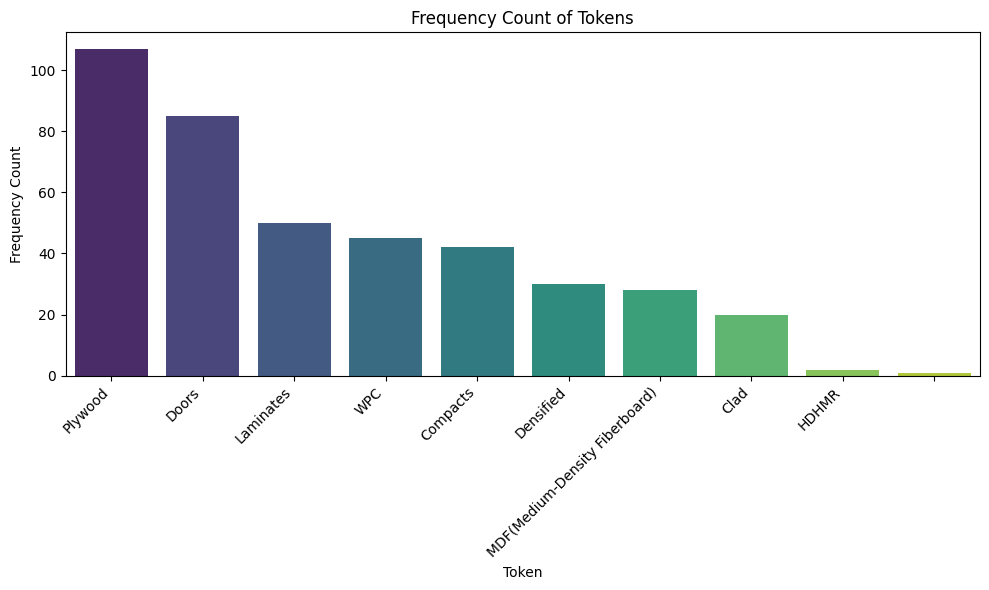

                            Token  Frequency Count
0                         Plywood              107
1                           Doors               85
2                       Laminates               50
3                             WPC               45
4                        Compacts               42
5                       Densified               30
6  MDF(Medium-Density Fiberboard)               28
7                            Clad               20
8                           HDHMR                2
9                                                1


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Getting the frequency count of each token and creating a DataFrame
frequency_count_df = pd.DataFrame(token_counts.value_counts()).reset_index()
frequency_count_df.columns = ['Token', 'Frequency Count']

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Token', y='Frequency Count', data=frequency_count_df, palette='viridis')
plt.xlabel('Token')
plt.ylabel('Frequency Count')
plt.title('Frequency Count of Tokens')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

print(frequency_count_df)


In [24]:
# Flatten the responses (split by comma and strip whitespace)
token_counts = demographic_variables['Products'].str.strip().str.split(',').apply(lambda x: [token.strip() for token in x]).explode()

# Getting the frequency count of each token and creating a DataFrame
frequency_count_df = pd.DataFrame(token_counts.value_counts()).reset_index()
frequency_count_df.columns = ['Token', 'Frequency Count']

In [25]:
frequency_count_df=frequency_count_df.head(8)

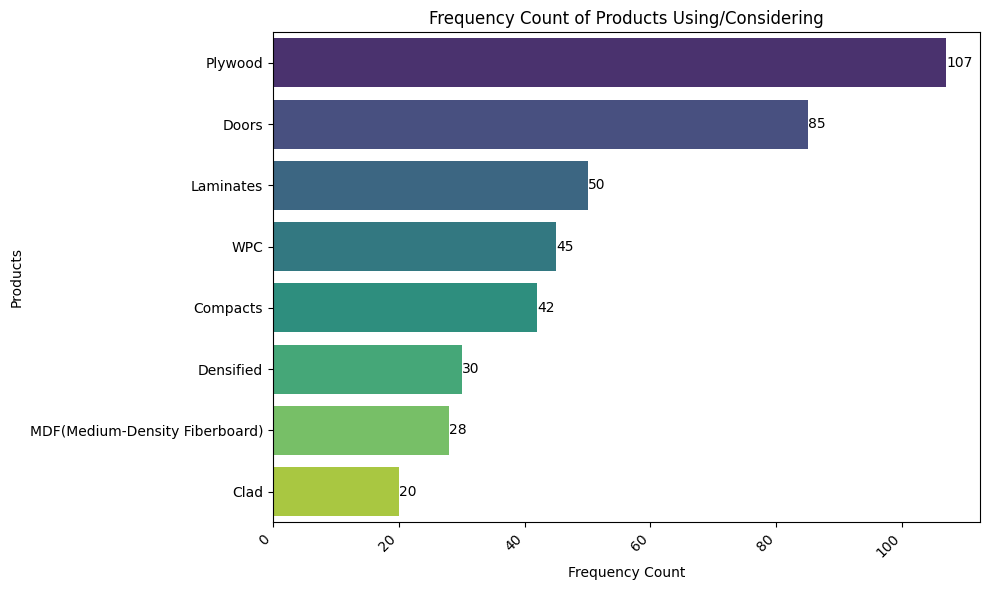

In [26]:
# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency Count', y='Token', data=frequency_count_df, palette='viridis')

# Annotate the bars with the frequency counts
for index, value in enumerate(frequency_count_df['Frequency Count']):
    plt.text(value, index, f'{value}', va='center')

plt.xlabel('Frequency Count')
plt.ylabel('Products')
plt.title('Frequency Count of Products Using/Considering')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig(f'./test/uSING', bbox_inches='tight')
plt.show()

In [27]:
# rank factors
factor_rankings=factors.describe().transpose().sort_values(by='mean', ascending=False).iloc[:,0:3].round(decimals=3)

In [28]:
def get_var_name(variable):
     for name, value in globals().items():
        if value is variable:
            return name

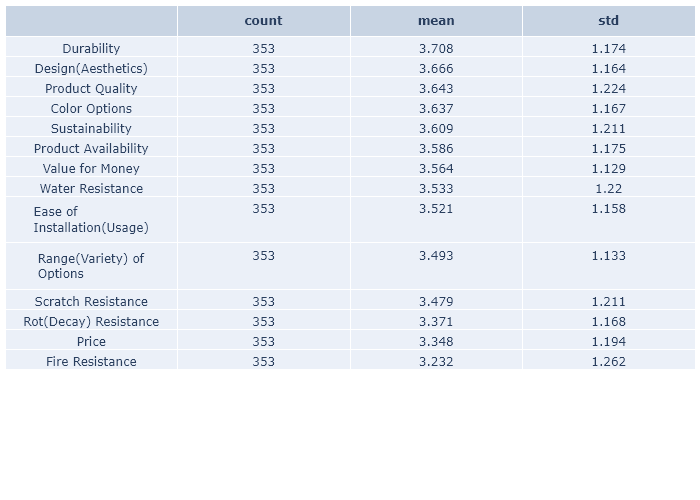

In [29]:
def df_img(df):
    fig = df2img.plot_dataframe(df, fig_size=(700, 500))
    name=get_var_name(df)
    df2img.save_dataframe(fig=fig, filename=f'./test/{name}.png')

df_img(factor_rankings)

In [30]:
def hist_save(df):
    for i,j in zip(df.columns, range(0, len(df.columns))):
        sns.histplot(x=df[i], stat="percent", binwidth=0.5, kde=True, discrete=True)
        name='F'+str(j+1)+'_'+df.columns[j]+'.png'
        plt.savefig(f'./test/{name}')
        plt.close()

hist_save(factors)

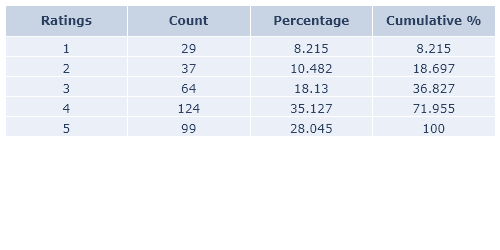

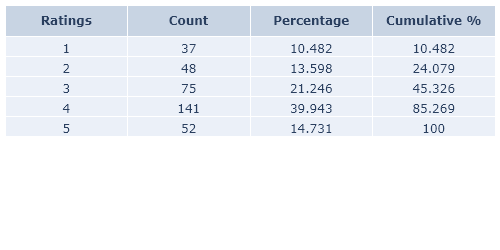

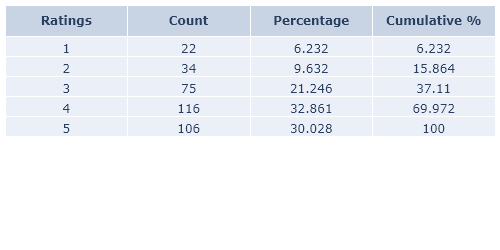

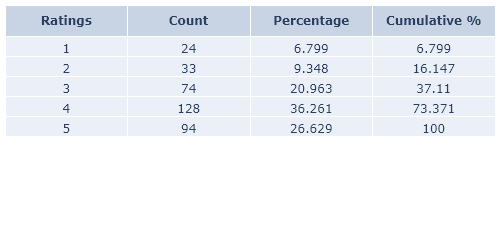

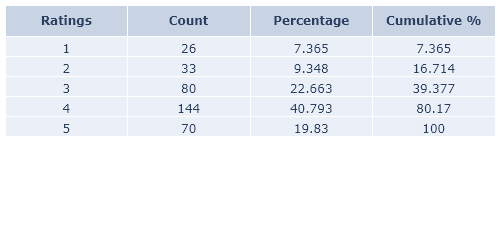

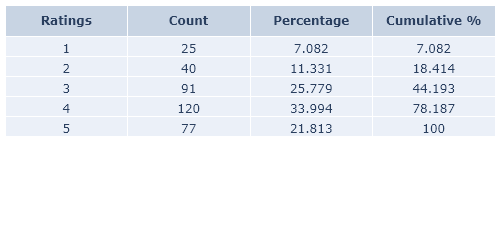

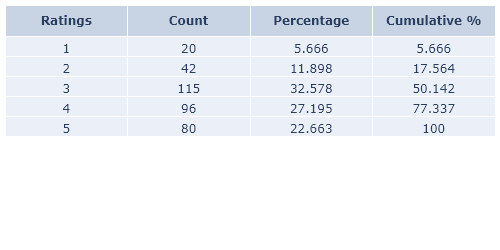

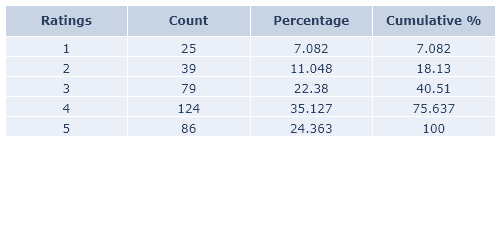

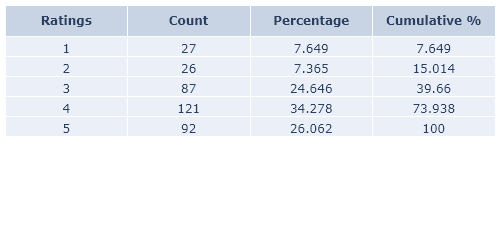

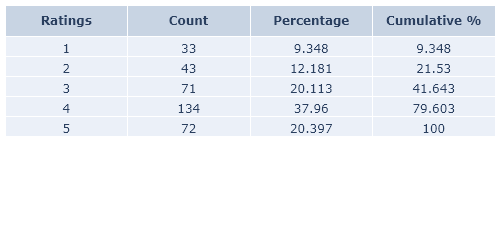

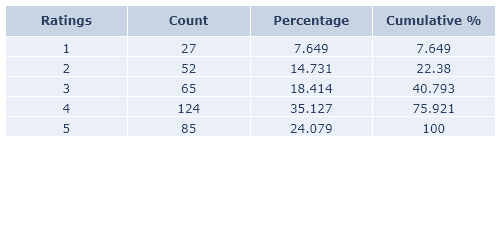

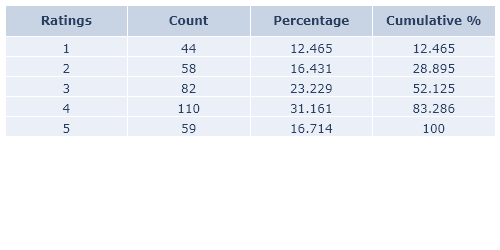

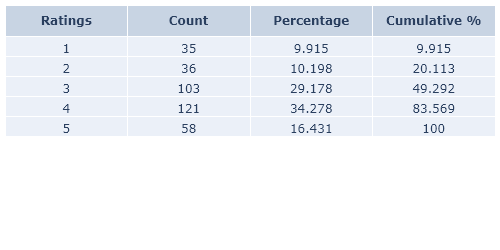

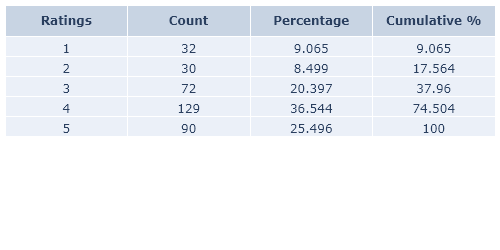

In [31]:
freq_table(factors)

In [32]:
def cronbach_alpha(df):    # 1. Transform the df into a correlation matrix
    df_corr = df.corr()
    
    # 2.1 Calculate N
    # The number of variables equals the number of columns in the df
    N = df.shape[1]
    # 2.2 Calculate R
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array calles "r_s". Then, we'll
    # calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)   
   # 3. Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

print("Value of Cronbach Alpha =",cronbach_alpha(factors))

Value of Cronbach Alpha = 0.9326175480108946


In [33]:
# Boxplots for variability check
fig, ax = plt.subplots(figsize=(50, 8))
sns.violinplot(factors, ax=ax)
plt.savefig('./test/Boxplots.png')
plt.close()

# Correlation Matrix Heatmap
plt.figure(figsize=(18,18))
sns.heatmap(factors.corr(),annot=True,cmap='YlGnBu')
plt.savefig('./test/Correlation_Matrix.png')
plt.close()

In [34]:
def vif(df):
    ## Calculating VIF for numerical variables
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                              for i in range(len(df.columns))]
    # printing the vif values
    print(vif_data.sort_values('VIF', ascending=False))
    
vif(factors)

                        feature        VIF
2                    Durability  25.303889
3            Design(Aesthetics)  24.920567
8                 Color Options  24.859275
13               Sustainability  23.310249
4               Value for Money  22.235328
0               Product Quality  21.093433
6     Range(Variety) of Options  20.971970
10             Water Resistance  18.560256
9            Scratch Resistance  18.328706
7          Product Availability  18.138429
11              Fire Resistance  17.135064
1                         Price  17.000436
5   Ease of Installation(Usage)  16.694257
12        Rot(Decay) Resistance  16.692883


In [35]:
#plt.figure(figsize=(18,18))
#pc=utils.partial_correlations(factors)
#sns.heatmap(pc,annot=True,cmap='YlGnBu')

In [36]:
det=np.linalg.det(factors.corr().to_numpy())
print("The Determinant of the Correlation Matrix =", det)

The Determinant of the Correlation Matrix = 0.0004570139802876834


In [37]:
#bartlett test
chi_square_value,p_value=calculate_bartlett_sphericity(factors)
print(f"The chi-square value of the Bartlett's test is = {chi_square_value}, with a p-value of {p_value}")

The chi-square value of the Bartlett's test is = 2664.8610136182447, with a p-value of 0.0


In [38]:
# KMO
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(factors)
print(f'The KMO value is {kmo_model}')

The KMO value is 0.9567670980480252


In [39]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation=None)
fa.fit(factors)
# Check #factors based on #eigen-values>1
fn=sum(fa.get_eigenvalues()[0]>1)

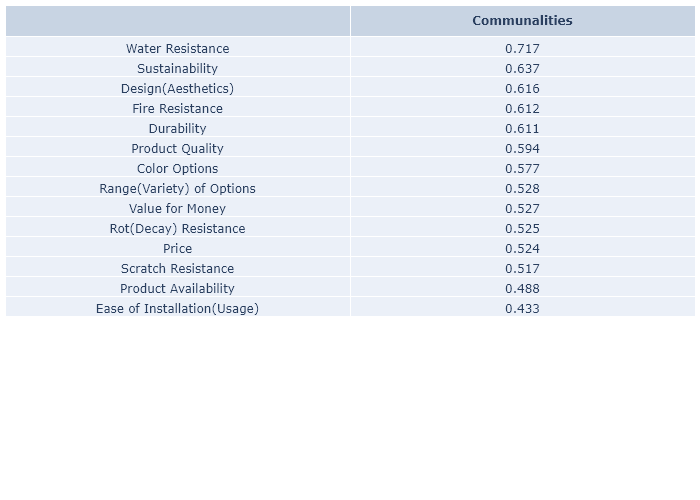

In [40]:
# Communalities
communalities=pd.DataFrame(fa.get_communalities(), index=factors.columns, columns=["Communalities"]).sort_values(by='Communalities',ascending=False)
communalities_initial=communalities.round(decimals=3)
df_img(communalities_initial)

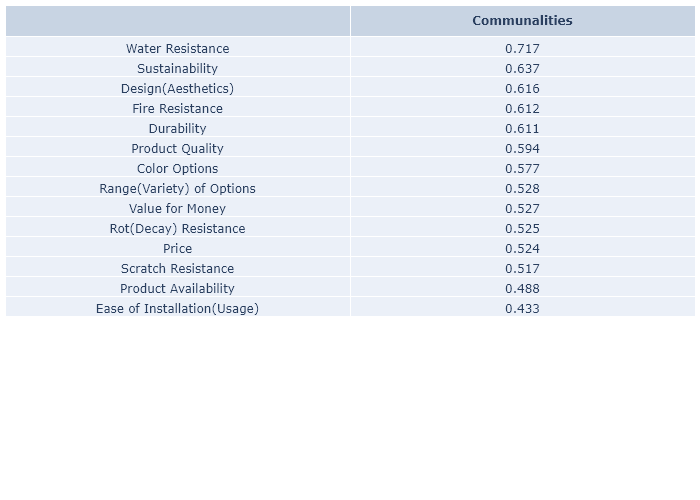

In [41]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation=None)
fa.fit(factors)
# Check #factors based on #eigen-values>1
fn=sum(fa.get_eigenvalues()[0]>1)
# Communalities
communalities=pd.DataFrame(fa.get_communalities(), index=factors.columns, columns=["Communalities"]).sort_values(by='Communalities',ascending=False)
communalities=communalities.round(decimals=3)
df_img(communalities)

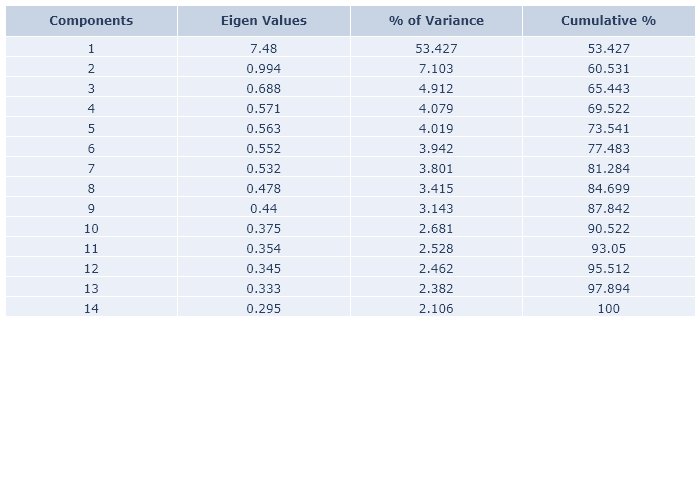

In [42]:
# Total Variance Explained
eigen_values=pd.DataFrame(fa.get_eigenvalues()[0], columns=['Eigen Values'])
eigen_values.index.name='Components'
eigen_values.index += 1
eigen_values['% of Variance']=(eigen_values['Eigen Values']/eigen_values['Eigen Values'].sum())*100
eigen_values['Cumulative %']=(eigen_values['Eigen Values'].cumsum()/eigen_values['Eigen Values'].sum())*100
eigen_values=eigen_values.round(decimals=3)
df_img(eigen_values)

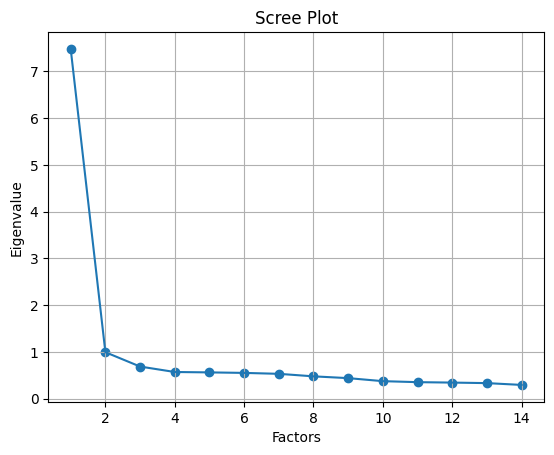

In [43]:
# Create scree plot using matplotlib
plt.scatter(range(1,factors.shape[1]+1),fa.get_eigenvalues()[0])
plt.plot(range(1,factors.shape[1]+1),fa.get_eigenvalues()[0])
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.savefig('./test/Scree_Plot.png')
plt.show()

***Create factor analysis object and perform factor analysis***

In [60]:
# Varimax
fa = FactorAnalyzer(n_factors=2, rotation="varimax")
fa.fit(factors)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

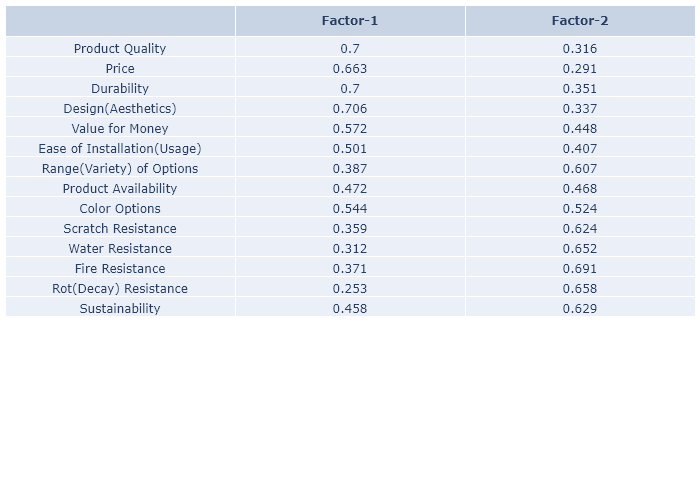

In [61]:
loadings=pd.DataFrame.from_records(fa.loadings_)
l1=[]
for i in range(1,len(loadings.columns)+1):
    l1.append(f"Factor-{i}")
loadings.index=factors.columns
loadings.columns=l1
loadings_varimax=loadings.round(decimals=3)
df_img(loadings_varimax)

In [62]:
tf=loadings_varimax>0.5
tf.sum(axis=1)

Product Quality                1
Price                          1
Durability                     1
Design(Aesthetics)             1
Value for Money                1
Ease of Installation(Usage)    1
Range(Variety) of Options      1
Product Availability           0
Color Options                  2
Scratch Resistance             1
Water Resistance               1
Fire Resistance                1
Rot(Decay) Resistance          1
Sustainability                 1
dtype: int64

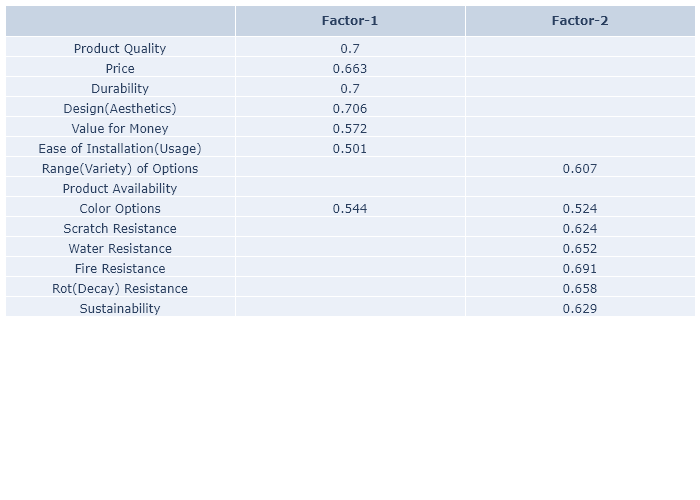

In [63]:
ld=loadings[loadings>0.5].round(decimals=3)
varimax_ld=ld.replace(np.nan,'',regex=True)
df_img(varimax_ld)

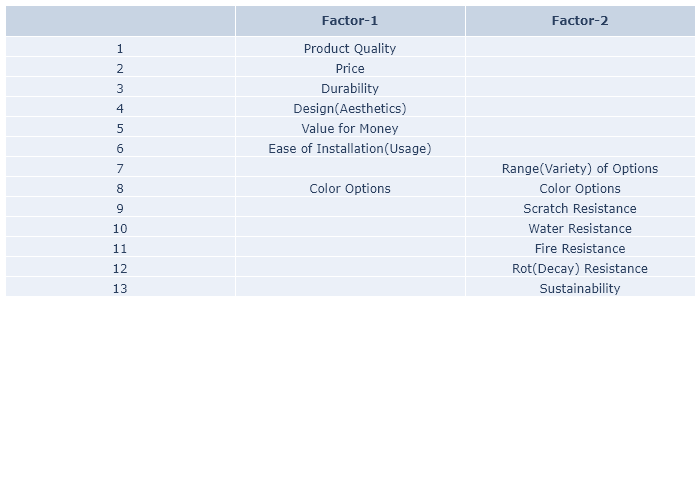

In [64]:
ft=loadings[loadings>0.5].round(decimals=3)
for i in range(0, len(ft.index)):
    ft.iloc[i]=ft.iloc[i].notnull().replace([True, False], [ft.index[i], np.NaN])
ft=ft.dropna(how='all')
ft=ft.replace(np.nan,'',regex=True)
varimax_ft=ft.reset_index(drop=True)
varimax_ft.index += 1
df_img(varimax_ft)

In [67]:
# Promax
pro_fa = FactorAnalyzer(n_factors=2, rotation="promax")
pro_fa.fit(factors)

FactorAnalyzer(n_factors=2, rotation_kwargs={})

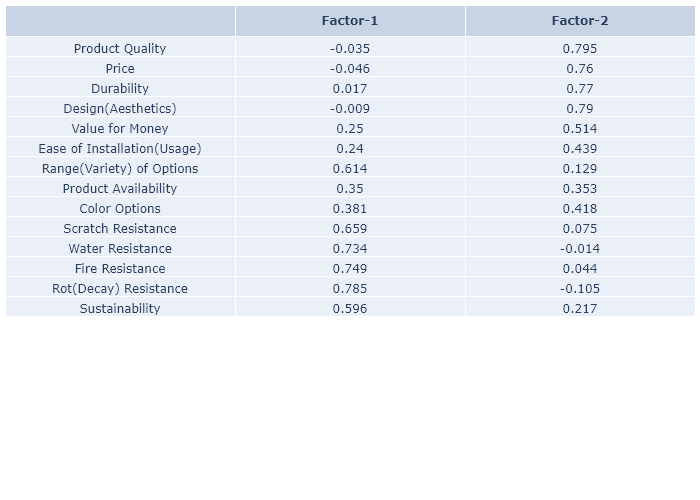

In [68]:
loadings=pd.DataFrame.from_records(pro_fa.loadings_)
l1=[]
for i in range(1,len(loadings.columns)+1):
    l1.append(f"Factor-{i}")
loadings.index=factors.columns
loadings.columns=l1
loadings_promax=loadings.round(decimals=3)
df_img(loadings_promax)

In [69]:
pro_tf=loadings_promax>0.5
pro_tf.sum(axis=1)

Product Quality                1
Price                          1
Durability                     1
Design(Aesthetics)             1
Value for Money                1
Ease of Installation(Usage)    0
Range(Variety) of Options      1
Product Availability           0
Color Options                  0
Scratch Resistance             1
Water Resistance               1
Fire Resistance                1
Rot(Decay) Resistance          1
Sustainability                 1
dtype: int64

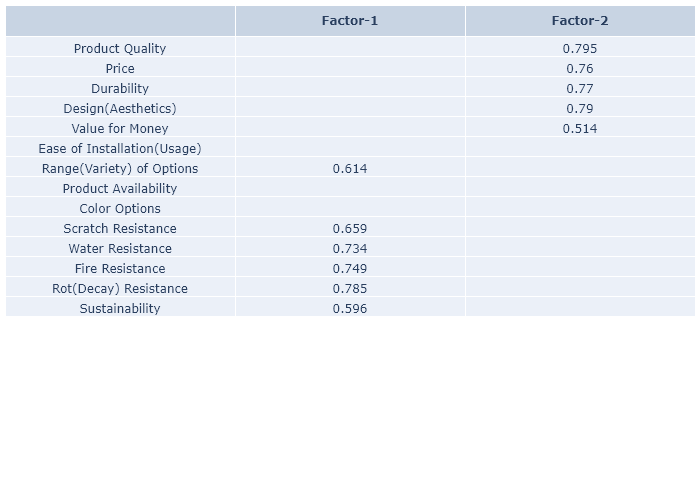

In [70]:
pro_ld=loadings[loadings>0.5].round(decimals=3)
promax_ld=pro_ld.replace(np.nan,'',regex=True)
df_img(promax_ld)

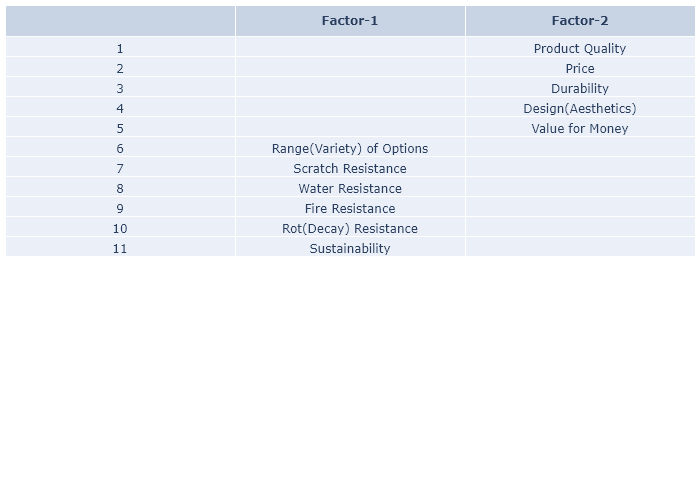

In [71]:
ft=loadings[loadings>0.5].round(decimals=3)
for i in range(0, len(ft.index)):
    ft.iloc[i]=ft.iloc[i].notnull().replace([True, False], [ft.index[i], np.NaN])
ft=ft.dropna(how='all')
ft=ft.replace(np.nan,'',regex=True)
promax_ft=ft.reset_index(drop=True)
promax_ft.index += 1
df_img(promax_ft)

In [72]:
def kmo(dataset_corr):

    #KMO Test
    #inverse of the correlation matrix
    corr_inv = np.linalg.inv(dataset_corr)
    nrow_inv_corr, ncol_inv_corr = dataset_corr.shape
    
    #partial correlation matrix
    A = np.ones((nrow_inv_corr,ncol_inv_corr))
    for i in range(0,nrow_inv_corr,1):
        for j in range(i,ncol_inv_corr,1):
            #above the diagonal
            A[i,j] = - (corr_inv[i,j]) / (math.sqrt(corr_inv[i,i] * corr_inv[j,j]))
            #below the diagonal
            A[j,i] = A[i,j]
    
    #transform to an array of arrays ("matrix" with Python)
    dataset_corr = np.asarray(dataset_corr)
        
    #KMO value
    kmo_num = np.sum(np.square(dataset_corr)) - np.sum(np.square(np.diagonal(dataset_corr)))
    kmo_denom = kmo_num + np.sum(np.square(A)) - np.sum(np.square(np.diagonal(A)))
    kmo_value = kmo_num / kmo_denom
    
    
    kmo_j = [None]*dataset_corr.shape[1]
    #KMO per variable (diagonal of the spss anti-image matrix)
    for j in range(0, dataset_corr.shape[1]):
        kmo_j_num = np.sum(dataset_corr[:,[j]] ** 2) - dataset_corr[j,j] ** 2
        kmo_j_denom = kmo_j_num + np.sum(A[:,[j]] ** 2) - A[j,j] ** 2
        kmo_j[j] = kmo_j_num / kmo_j_denom

    
    Result = collections.namedtuple("KMO_Test_Results", ["value", "per_variable"])   
    
    #test of the results - named tuple    
    return Result(value=kmo_value,per_variable=kmo_j)

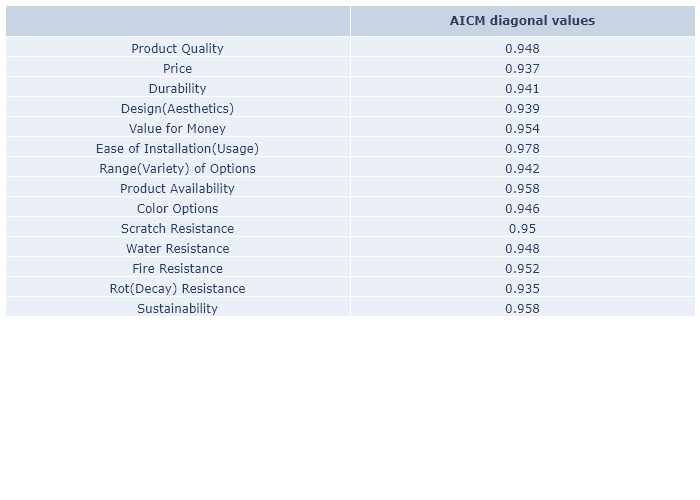

In [73]:
aicm_values=kmo(factors.corr(method='spearman'))[1]
aicm=pd.DataFrame()
aicm.index=factors.columns
aicm['AICM diagonal values']=aicm_values
aicm=aicm.round(decimals=3)
df_img(aicm)